In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError

In [4]:
df = sns.load_dataset("mpg")

In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.name.nunique()

305

In [10]:
df.drop("name", axis=1, inplace=True)

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum().any()

False

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [15]:
today = datetime.today()

In [16]:
this_year = today.year
this_year

2021

In [17]:
df["age"] = this_year - (1900+df.model_year)

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,51
1,15.0,8,350.0,165.0,3693,11.5,70,usa,51
2,18.0,8,318.0,150.0,3436,11.0,70,usa,51
3,16.0,8,304.0,150.0,3433,12.0,70,usa,51
4,17.0,8,302.0,140.0,3449,10.5,70,usa,51


In [19]:
df.drop("model_year", axis=1, inplace=True)

#Beware of dummy-trap.

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,51,0,1
1,15.0,8,350.0,165.0,3693,11.5,51,0,1
2,18.0,8,318.0,150.0,3436,11.0,51,0,1
3,16.0,8,304.0,150.0,3433,12.0,51,0,1
4,17.0,8,302.0,140.0,3449,10.5,51,0,1


In [22]:
X = df.drop("mpg", axis=1)

In [23]:
y = df.mpg

In [24]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,51,0,1
1,8,350.0,165.0,3693,11.5,51,0,1
2,8,318.0,150.0,3436,11.0,51,0,1
3,8,304.0,150.0,3433,12.0,51,0,1
4,8,302.0,140.0,3449,10.5,51,0,1


In [25]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
lm.intercept_

80.00010609150036

In [31]:
lm.coef_

array([-0.34210131,  0.01920596, -0.0216204 , -0.00642267,  0.04219811,
       -0.79716146,  0.33046978, -2.87549946])

In [32]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

In [33]:
coeff_parameter

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


In [34]:
y_pred = lm.predict(X_test)

In [35]:
eval_metrics(y_test, y_pred)

r2_score: 0.7922774714022585 
 mae: 2.461999698066146 
 mse: 10.602279011688351 
 rmse: 3.2561140968473987


In [36]:
my_dict = {"Actual": y_test, "Pred": y_pred}

In [37]:
compare = pd.DataFrame(my_dict)

In [38]:
compare.sample(10)

,Actual,Pred
18,27.0,25.198896
56,26.0,24.441176
307,26.8,25.630638
94,13.0,9.979099
102,26.0,29.598336
147,24.0,28.387192
57,24.0,26.040814
78,21.0,21.684247
335,35.0,30.969119
111,18.0,27.367018


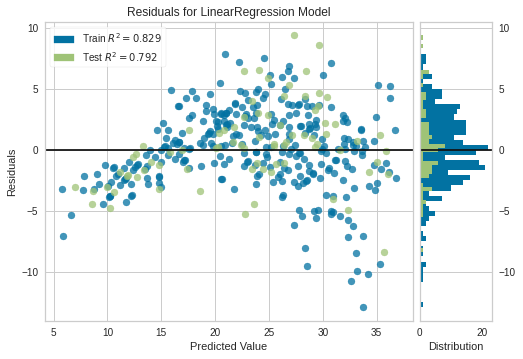

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
model = lm
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

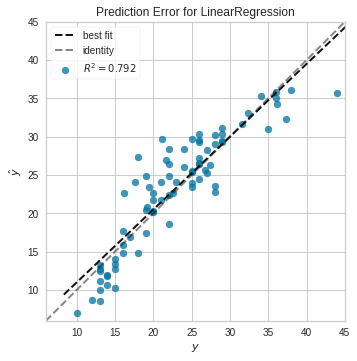

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:
model = lm
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()